# Projet Final R

Victor Simonin & Alexandre Lemonnier

Dataset : `decathlon.csv`

In [290]:
install.packages("pander")

Installing package into ‘/home/bictole/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



---

## Import des bibliothèques

Pour commencer il est nécessaire d'importer les bibliothèques qui nous permettront d'utiliser leurs fonctions par la suite du projet

In [293]:
library("VIM") # Pour la visualisation des valeurs manquantes
library("corrplot") # Pour les matrices de corrélation.
library("factoextra") # Pour les graphes de l'ACP
library("FactoMineR")
library("PerformanceAnalytics") # Diagramme de dispersion
library("pander") # Pour la régression logistique

---

## Lecture du dataset

In [214]:
df = read.table('data/decathlon.csv',header = T ,sep = ';', dec = '.', row.names = 1)
head(df)

,X100m,Longueur,Poids,Hauteur,X400m,X110m.H,Disque,Perche,Javelot,X1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,JO
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,JO
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54,6,8287,JO


Le dataset ci-dessus est composé de plusieurs données assez différentes. Celles-ci représentent les scores obtenues par des athlètes de l'épreuve du decathlon au Jeux Olympiques, donc les scores des 10 épreuves ainsi que leur classement et leurs points.

---

## Visualisation des données manquantes

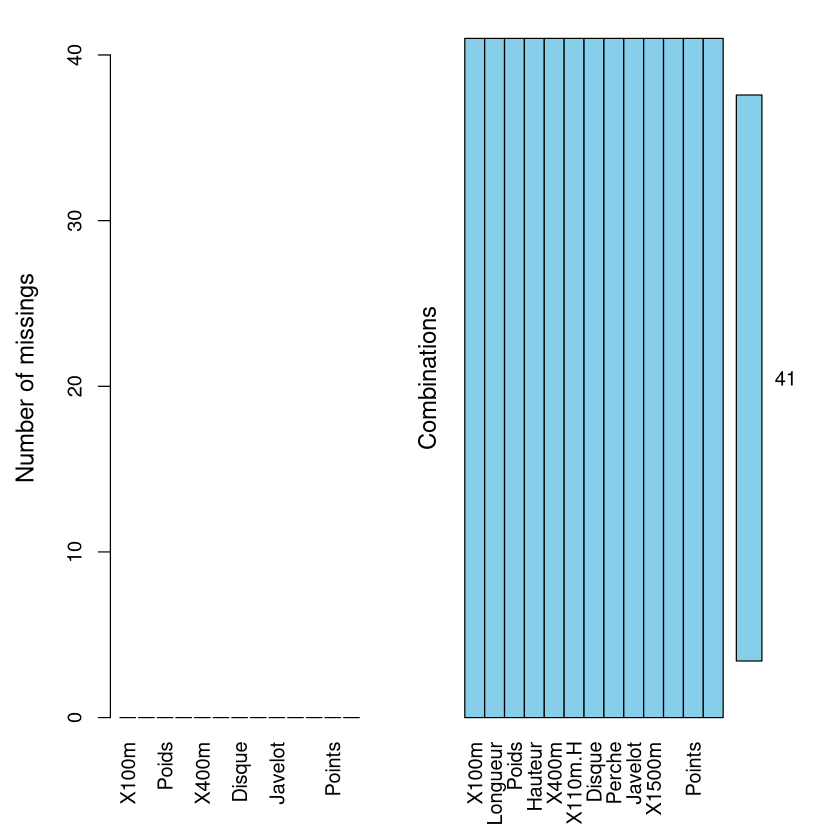

In [215]:
missdata = aggr(df, prop = F, number = T)

On peut voir ici que notre dataset ne semble pas contenir de données manquantes, ce qui facilite notre analyse et nous permet de continuer sereinement. Deux choix étaient possibles si jamais le dataset contenait des données manquantes, soit la suppression des lignes qui ne sont pas complètes, ou alors il est possible d'inférer ces données manquantes par plusieurs algorithmes.

Il faudra néanmoins vérifier qu’il n’y a aucune valeures aberrantes.

## Description du dataset

Cette section va nous servir à comprendre un peu mieux notre dataset, notamment sur sa taille, ses attributs et quelques statistiques descriptives sur les colonnes. 

En premier lieu, nous allons passer la colonne `Competition` qui est une colonne catégorique en colonne numérique.

In [279]:
table(df$Competition)
competition = df$competition


 1  2 
28 13 

On peut voir ici que notre dataset contient les résultats de deux compétitions, les `JO` et le `Decastar`, on va donc simplement remplacer ces deux valeurs par des valeurs numériques en suivant : `JO` = 1 et `Decastar` = 2.

In [217]:
df[1:28, 13] = 1
df[29:41, 13] = 2
df$Competition = as.numeric(as.character(df$Competition))

In [218]:
df

,X100m,Longueur,Poids,Hauteur,X400m,X110m.H,Disque,Perche,Javelot,X1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,1
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,1
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.60,55.54,278.11,3,8725,1
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,4,8414,1
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.90,55.39,278.05,5,8343,1
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,1
Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.80,57.76,264.35,7,8237,1
Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,1
Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.40,55.27,276.31,9,8225,1


Nos compétitions ont bien été modifié, ainsi que le type de la colonne, on a donc maintenant que des colonnes numériques dans notre dataset.

In [219]:
dim(df)

[1] 41 13

On comprend donc ici que notre dataset se compose de 41 individus qui ont chacun 13 données dans les colonnes qui servent à les qualifier et à les décrire.

In [220]:
attributes(df)

$names
 [1] "X100m"       "Longueur"    "Poids"       "Hauteur"     "X400m"      
 [6] "X110m.H"     "Disque"      "Perche"      "Javelot"     "X1500m"     
[11] "Classement"  "Points"      "Competition"

$row.names
 [1] "Sebrle"      "Clay"        "Karpov"      "Macey"       "Warners"    
 [6] "Zsivoczky"   "Hernu"       "Nool"        "Bernard"     "Schwarzl"   
[11] "Pogorelov"   "Schoenbeck"  "Barras"      "Smith"       "Averyanov"  
[16] "Ojaniemi"    "Smirnov"     "Qi"          "Drews"       "Parkhomenko"
[21] "Terek"       "Gomez"       "Turi"        "Lorenzo"     "Karlivans"  
[26] "Korkizoglou" "Uldal"       "Casarsa"     "SEBRLE"      "CLAY"       
[31] "KARPOV"      "BERNARD"     "YURKOV"      "WARNERS"     "ZSIVOCZKY"  
[36] "McMULLEN"    "MARTINEAU"   "HERNU"       "BARRAS"      "NOOL"       
[41] "BOURGUIGNON"

$class
[1] "data.frame"

add here explication sur le attributes

In [221]:
summary(df)

     X100m          Longueur        Poids          Hauteur          X400m      
 Min.   :10.44   Min.   :6.61   Min.   :12.68   Min.   :1.850   Min.   :46.81  
 1st Qu.:10.85   1st Qu.:7.03   1st Qu.:13.88   1st Qu.:1.920   1st Qu.:48.93  
 Median :10.98   Median :7.30   Median :14.57   Median :1.950   Median :49.40  
 Mean   :11.00   Mean   :7.26   Mean   :14.48   Mean   :1.977   Mean   :49.62  
 3rd Qu.:11.14   3rd Qu.:7.48   3rd Qu.:14.97   3rd Qu.:2.040   3rd Qu.:50.30  
 Max.   :11.64   Max.   :7.96   Max.   :16.36   Max.   :2.150   Max.   :53.20  
    X110m.H          Disque          Perche         Javelot     
 Min.   :13.97   Min.   :37.92   Min.   :4.200   Min.   :50.31  
 1st Qu.:14.21   1st Qu.:41.90   1st Qu.:4.500   1st Qu.:55.27  
 Median :14.48   Median :44.41   Median :4.800   Median :58.36  
 Mean   :14.61   Mean   :44.33   Mean   :4.762   Mean   :58.32  
 3rd Qu.:14.98   3rd Qu.:46.07   3rd Qu.:4.920   3rd Qu.:60.89  
 Max.   :15.67   Max.   :51.65   Max.   :5.400   M

add here explication sur le summary

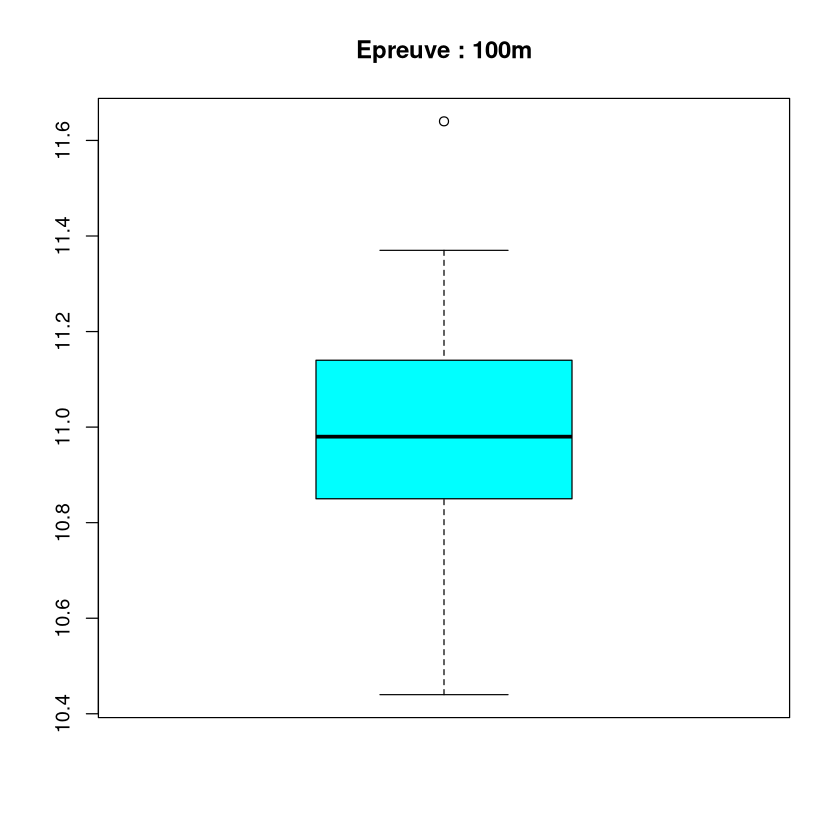

In [222]:
boxplot(df$X100m, col ='cyan', main = "Epreuve : 100m")

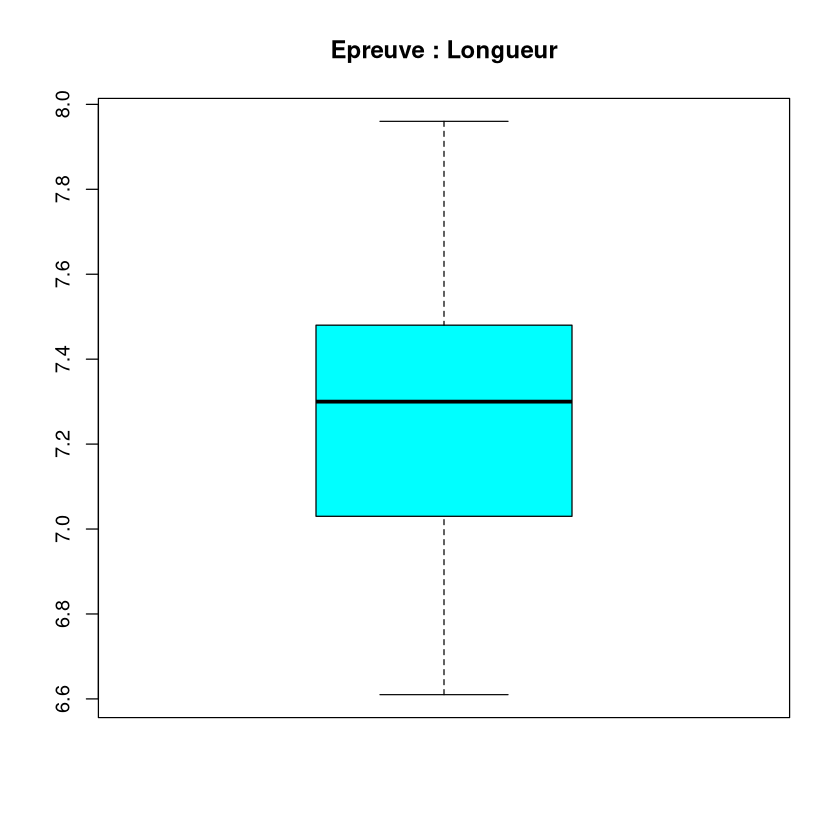

In [223]:
boxplot(df$Longueur, col ='cyan', main = "Epreuve : Longueur")

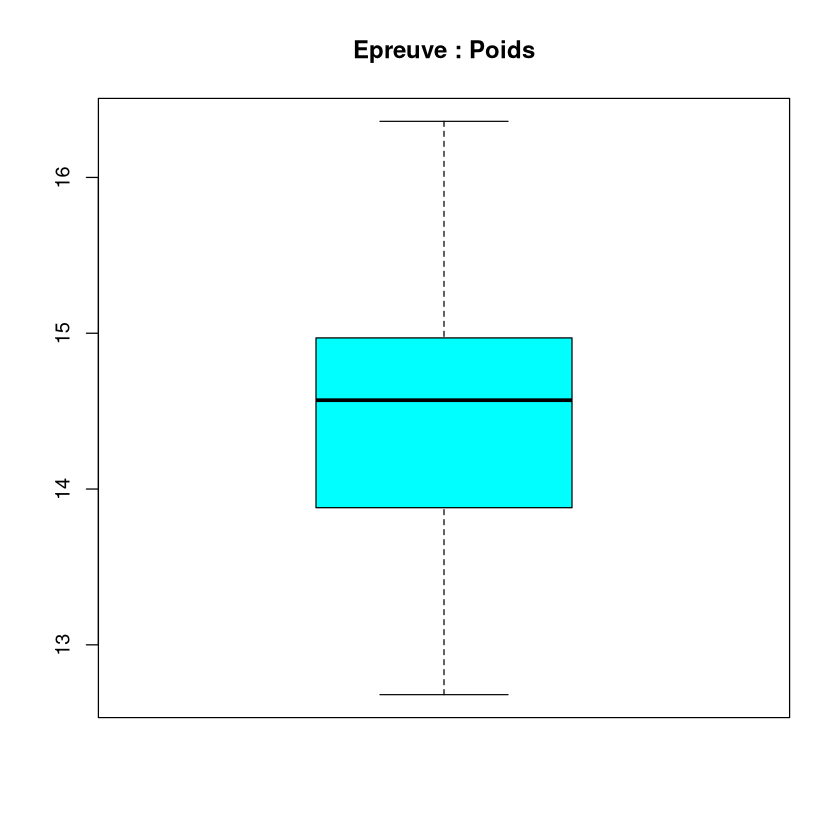

In [224]:
boxplot(df$Poids, col ='cyan', main = "Epreuve : Poids")

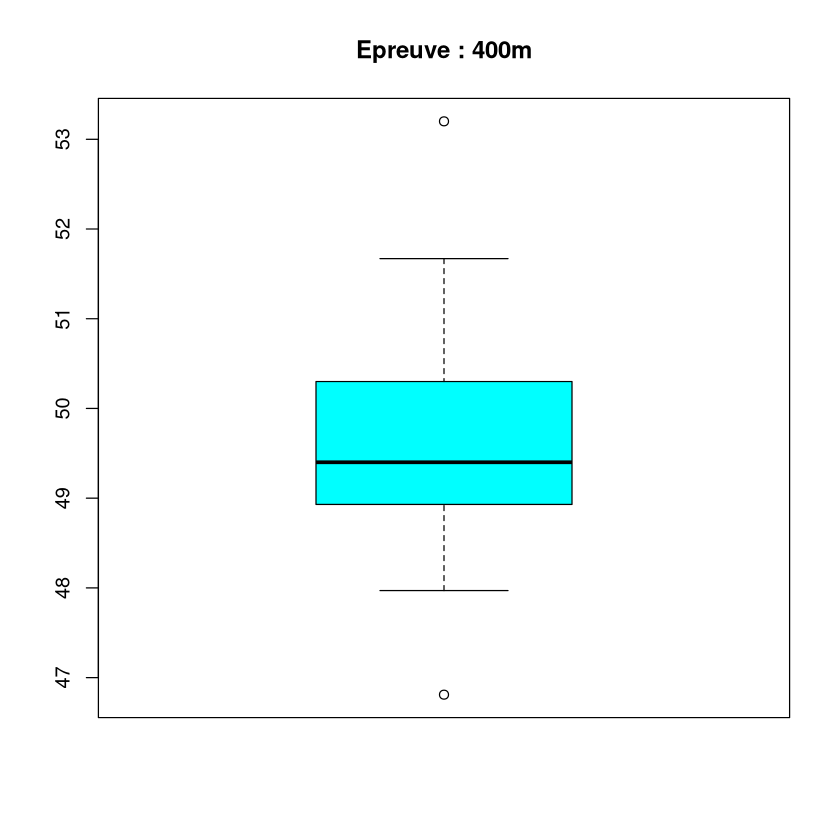

In [225]:
boxplot(df$X400m, col ='cyan', main = "Epreuve : 400m")

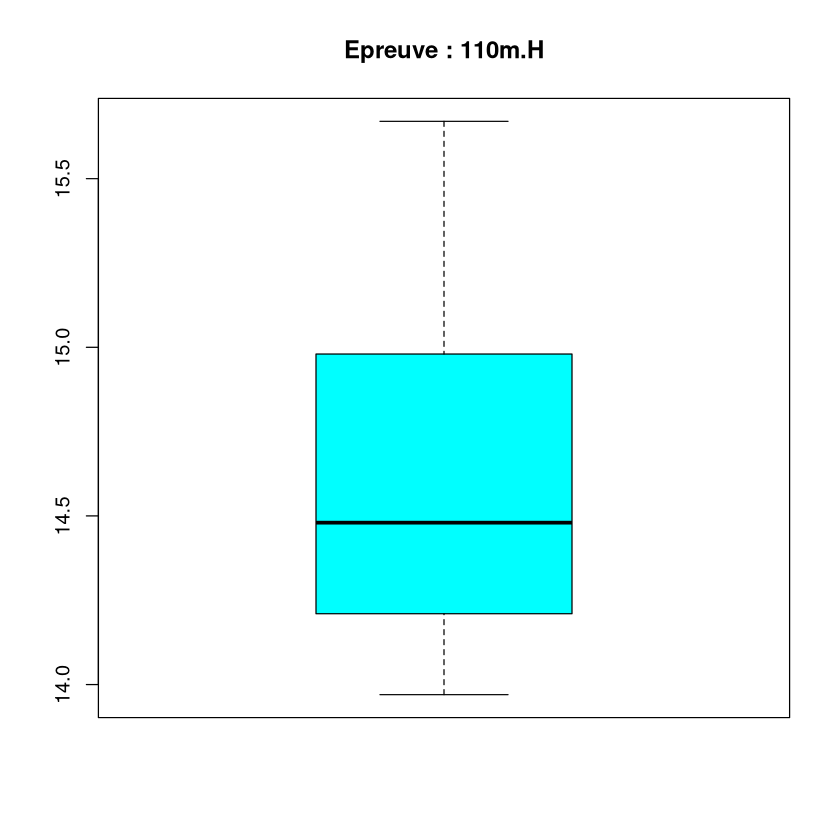

In [226]:
boxplot(df$X110m.H, col ='cyan', main = "Epreuve : 110m.H")

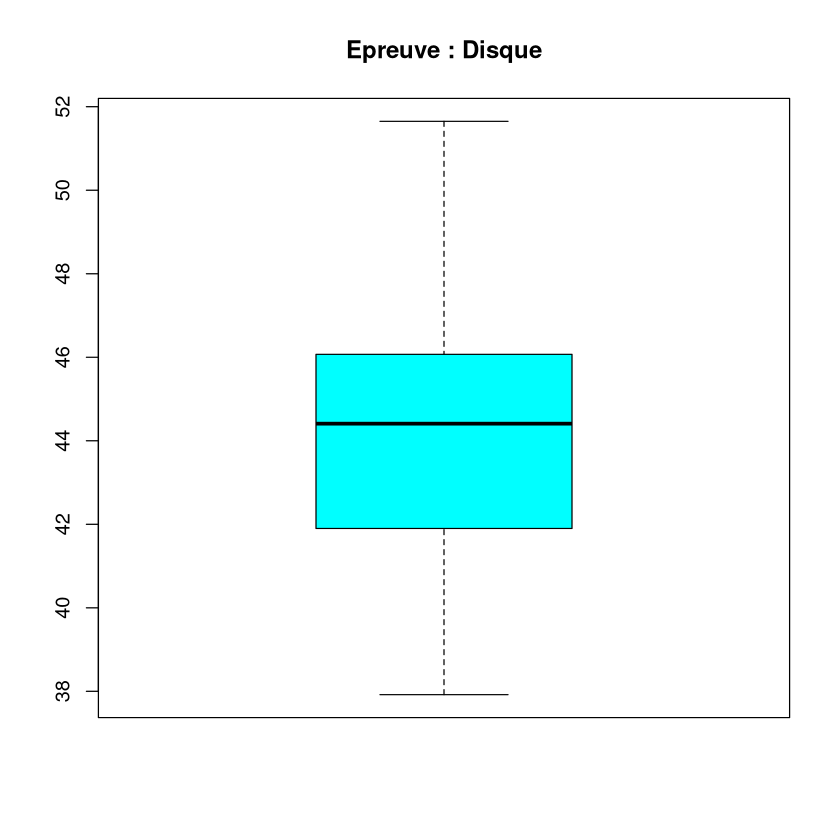

In [227]:
boxplot(df$Disque, col ='cyan', main = "Epreuve : Disque")

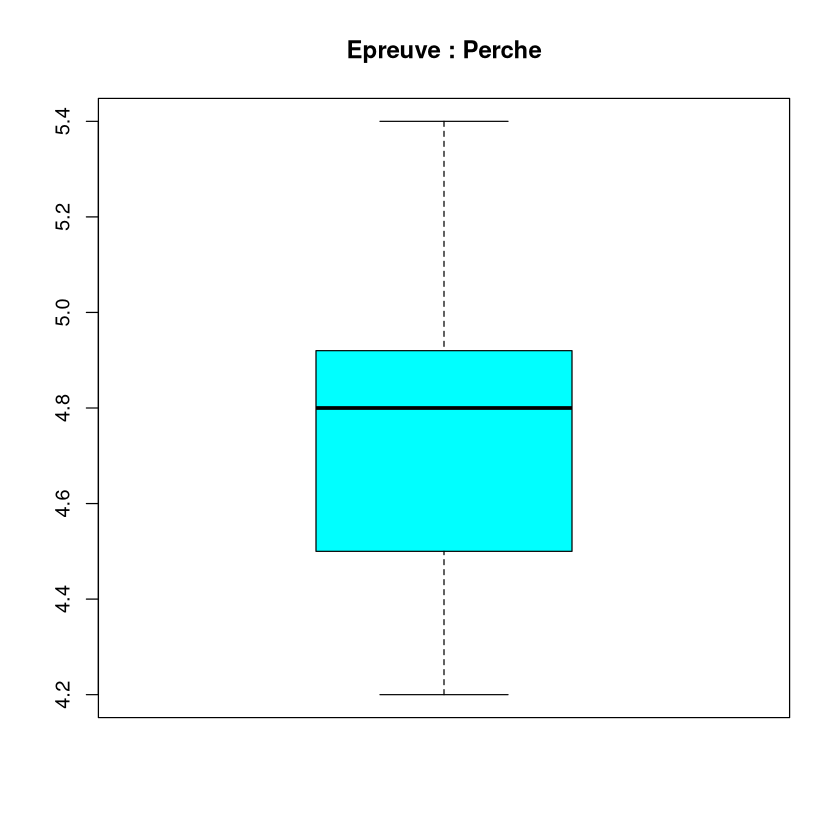

In [228]:
boxplot(df$Perche, col ='cyan', main = "Epreuve : Perche")

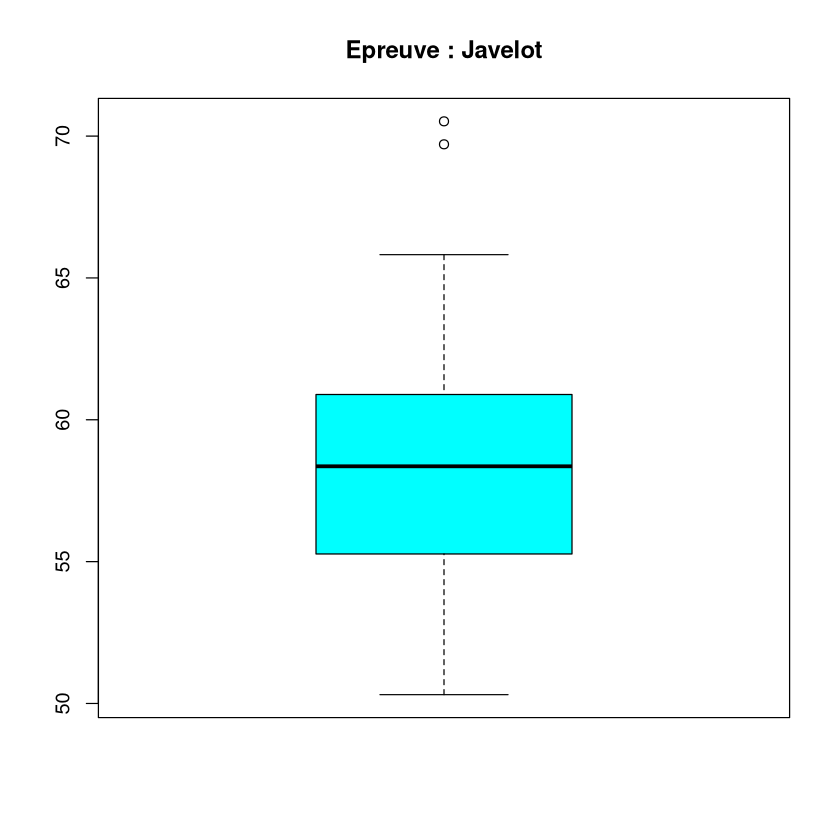

In [229]:
boxplot(df$Javelot, col ='cyan', main = "Epreuve : Javelot")

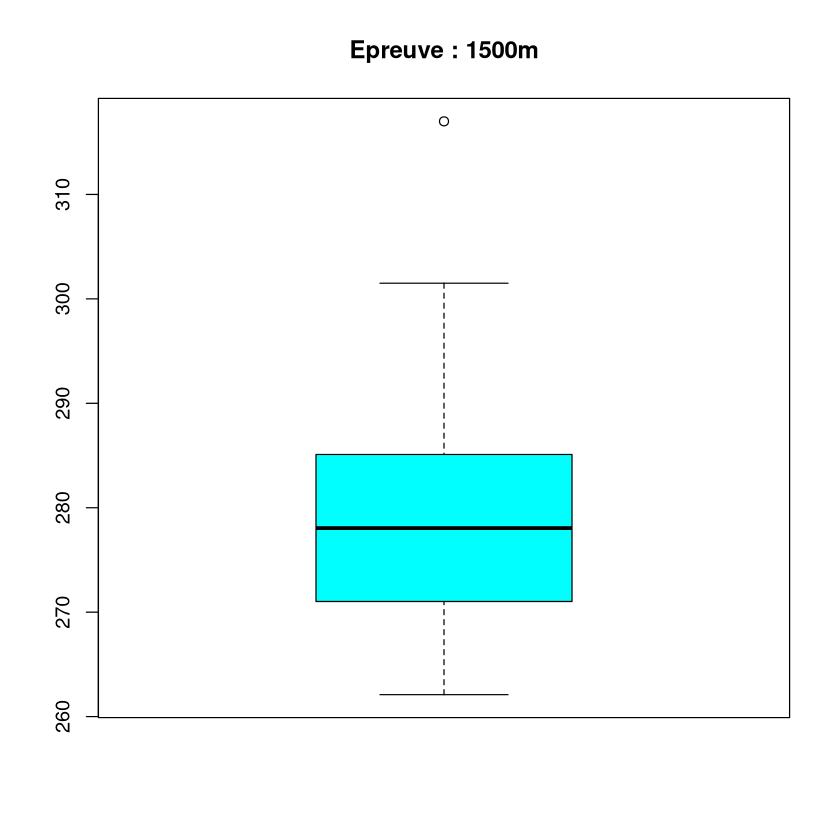

In [230]:
boxplot(df$X1500m, col ='cyan', main = "Epreuve : 1500m")

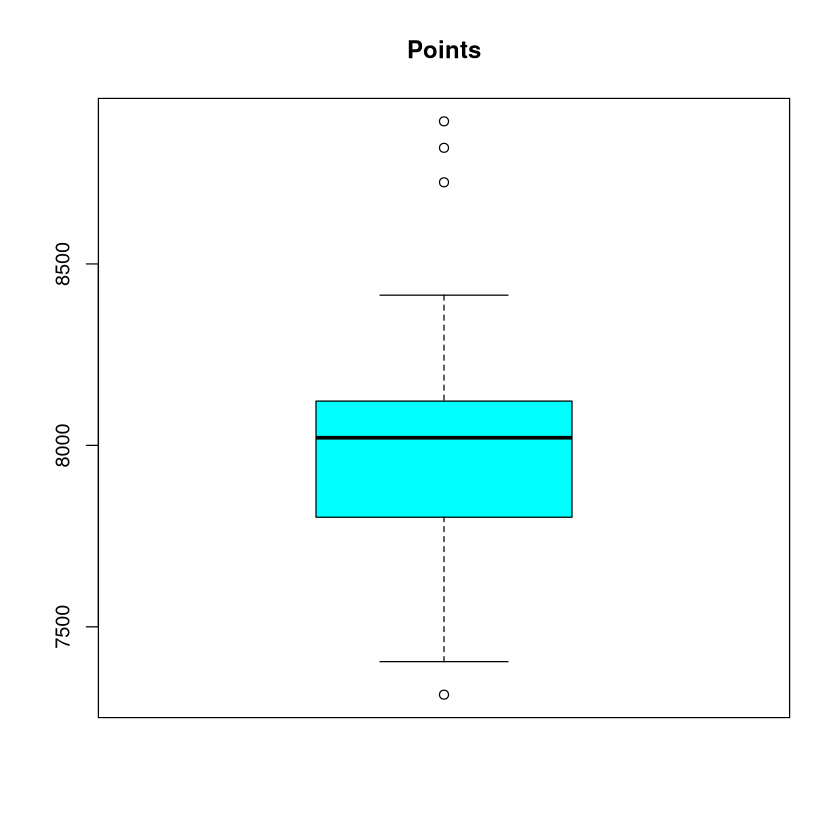

In [231]:
boxplot(df$Points, col ='cyan', main = "Points")

add ici explication sur tous les plots

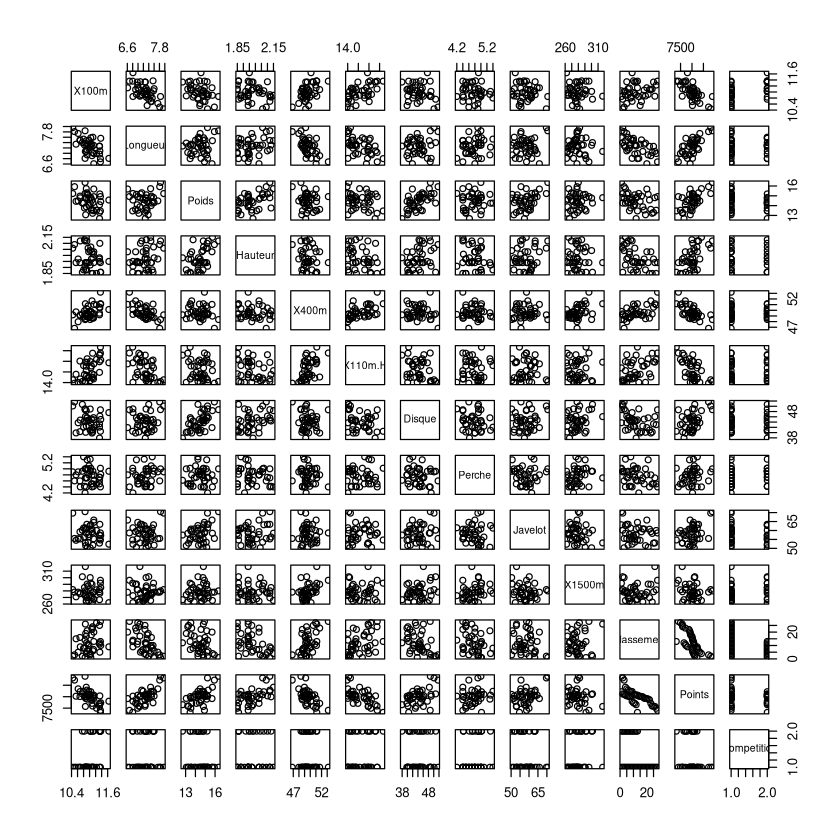

In [232]:
plot(df)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

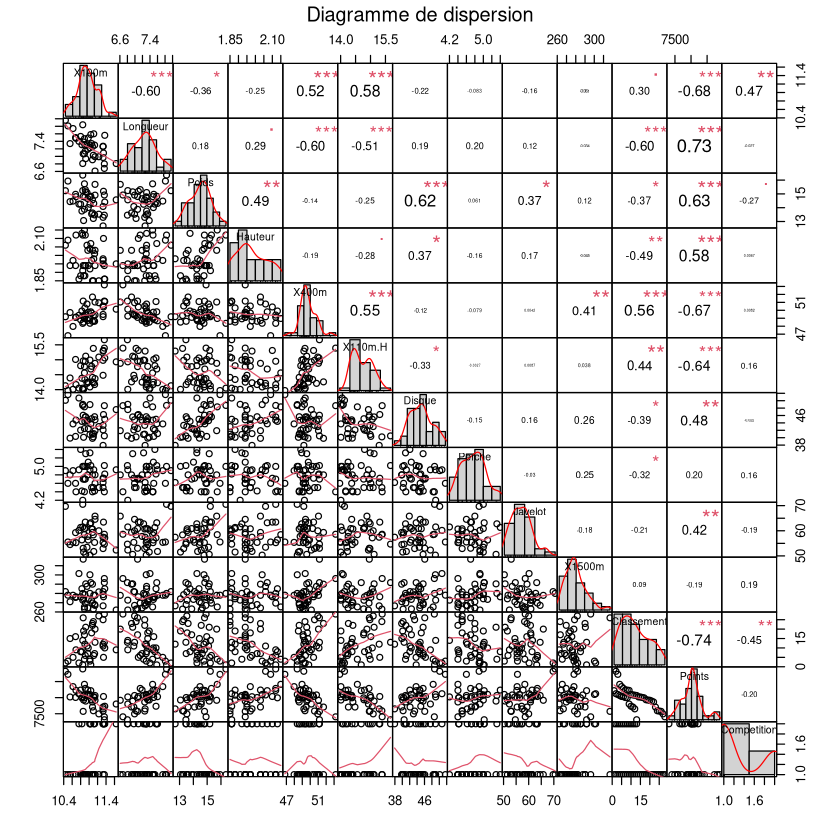

In [233]:
chart.Correlation(df, pch = 19)
mtext("Diagramme de dispersion", side = 3, line = 3)

choisir le meilleur graphe de dispersion et commenter

faire plus de stats et de joli schema

## PCA

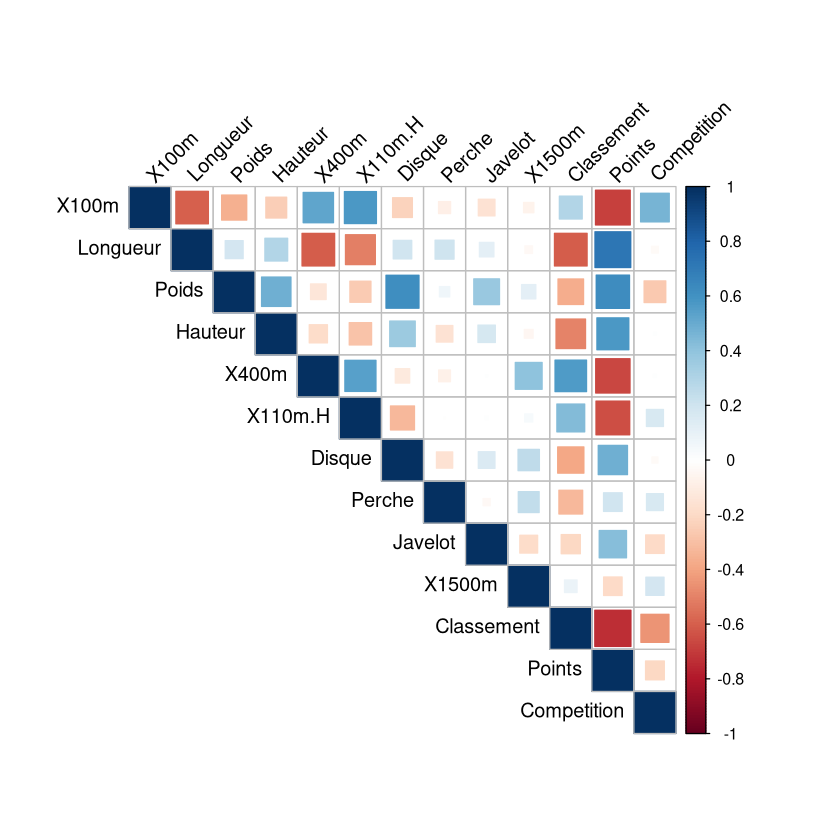

In [234]:
matrice_cor = cor(df)
corrplot(matrice_cor, type="upper", order="original", tl.col="black", tl.srt=45, method = "square")

ici explication de la correlation

In [258]:
df_scaled = scale(df[1:10], center = TRUE, scale = TRUE)
df_scaled = cbind(df_scaled, df[c("Classement", "Points", "Competition")])

In [263]:
head(df_scaled)

,X100m,Longueur,Poids,Hauteur,X400m,X110m.H,Disque,Perche,Javelot,X1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
Sebrle,-0.5628739,1.8331131,2.283919585,1.60955474,-1.0892025,-1.17818270,1.3009450,0.8545364,2.52825135,0.08439142,1,8893,1
Clay,-2.1216730,2.2123779,0.913271989,0.93502243,-0.3696226,-1.00861538,1.7124500,0.4948240,2.36043901,0.25486670,2,8820,1
Karpov,-1.8935560,1.7382969,1.762345721,1.27228858,-2.4329962,-1.34775002,2.1683620,-0.5843134,-0.57524110,-0.07837391,3,8725,1
Macey,-0.4107959,0.6637134,1.519753226,1.94682089,-0.5603546,-0.09719103,1.1884472,-1.3037383,0.02971203,-1.16547502,4,8414,1
Warners,-1.4373221,1.5170591,0.003550134,-0.07677604,-1.4273183,-1.26296636,-0.1763283,0.4948240,-0.60631746,-0.08351387,5,8343,1
Zsivoczky,-0.3347570,-0.3792648,1.010308987,1.60955474,-0.1875602,0.72944966,0.3832000,-0.2246009,1.06351893,-0.81253124,6,8287,1


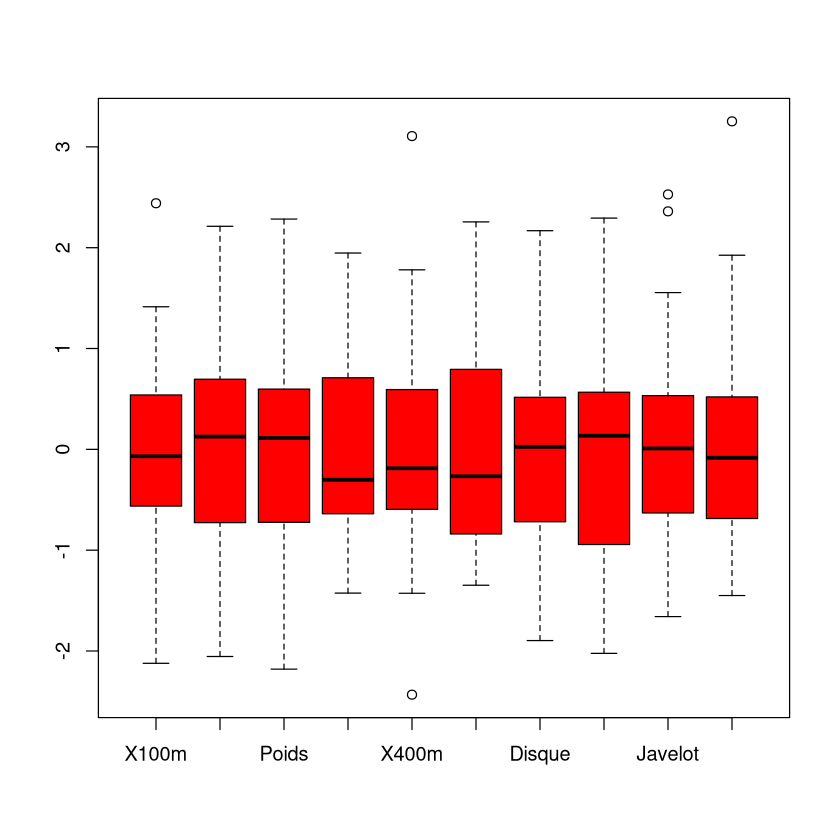

In [261]:
boxplot(df_scaled[1:10], col = 'red')

Pour passer aux étapes suivantes, il est nécessaire de normaliser nos données, ce qui est fait avec la fonction `scale` et qui nous permet d'obtenir un dataset normalisé.

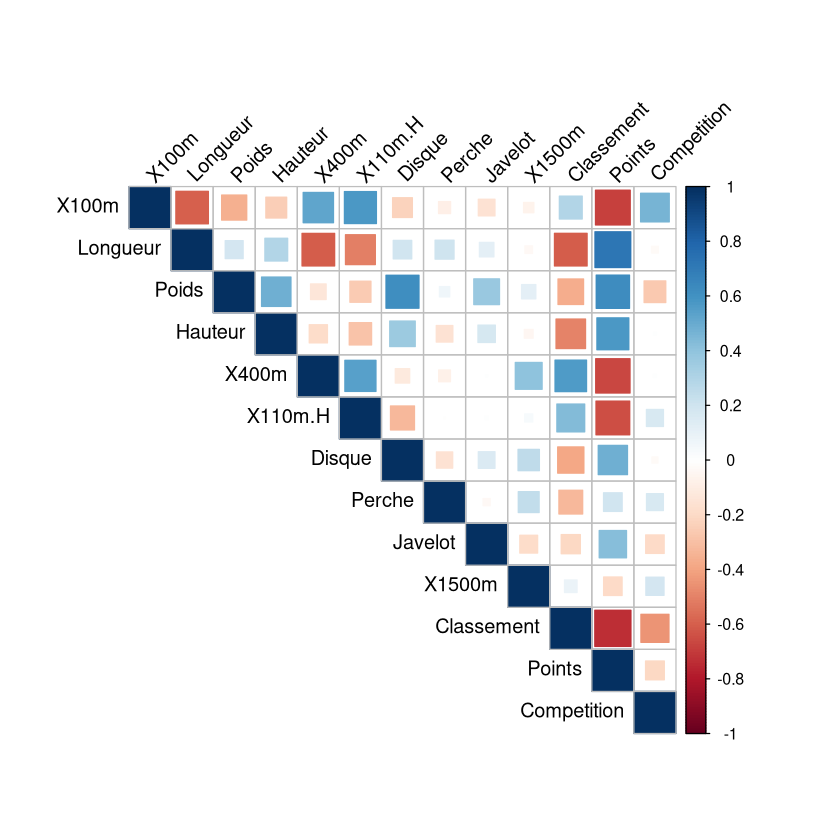

In [262]:
matrice_cor = cor(df_scaled)
corrplot(matrice_cor, type="upper", order="original", tl.col="black", tl.srt=45, method = "square")

réepliquer ici la corr apres scale

In [266]:
res_acp = prcomp(df_scaled[1:10], scale = FALSE)
res_acp

Standard deviations (1, .., p=10):
 [1] 1.8088409 1.3180027 1.1852918 1.0280323 0.8275104 0.7741245 0.6717405
 [8] 0.6299814 0.4634812 0.4268811

Rotation (n x k) = (10 x 10):
                 PC1        PC2         PC3         PC4         PC5         PC6
X100m     0.42829627  0.1419891 -0.15557953 -0.03678703 -0.36518741  0.29607739
Longueur -0.41015201 -0.2620794  0.15372674  0.09901016 -0.04432336 -0.30612478
Poids    -0.34414444  0.4539470 -0.01972378  0.18539458 -0.13431954  0.30547299
Hauteur  -0.31619436  0.2657761 -0.21894349 -0.13189684 -0.67121760 -0.46777116
X400m     0.37571570  0.4320460  0.11091758  0.02850297  0.10597034 -0.33252178
X110m.H   0.41255442  0.1735910 -0.07815576  0.28290068 -0.19857266 -0.09963776
Disque   -0.30542571  0.4600244  0.03623770 -0.25259074  0.12667770  0.44937288
Perche   -0.02783081 -0.1368411  0.58361717  0.53649480 -0.39873734  0.26166458
Javelot  -0.15319802  0.2405071 -0.32874217  0.69285498  0.36873120 -0.16320268
X1500m    0.03210733  0.

explication acp

In [270]:
get_eigenvalue(res_acp)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,3.2719055,32.719055,32.71906
Dim.2,1.7371310,17.371310,50.09037
Dim.3,1.4049167,14.049167,64.13953
Dim.4,1.0568504,10.568504,74.70804
Dim.5,0.6847735,6.847735,81.55577
Dim.6,0.5992687,5.992687,87.54846
Dim.7,0.4512353,4.512353,92.06081
Dim.8,0.3968766,3.968766,96.02958
Dim.9,0.2148149,2.148149,98.17773


explication valeures propres

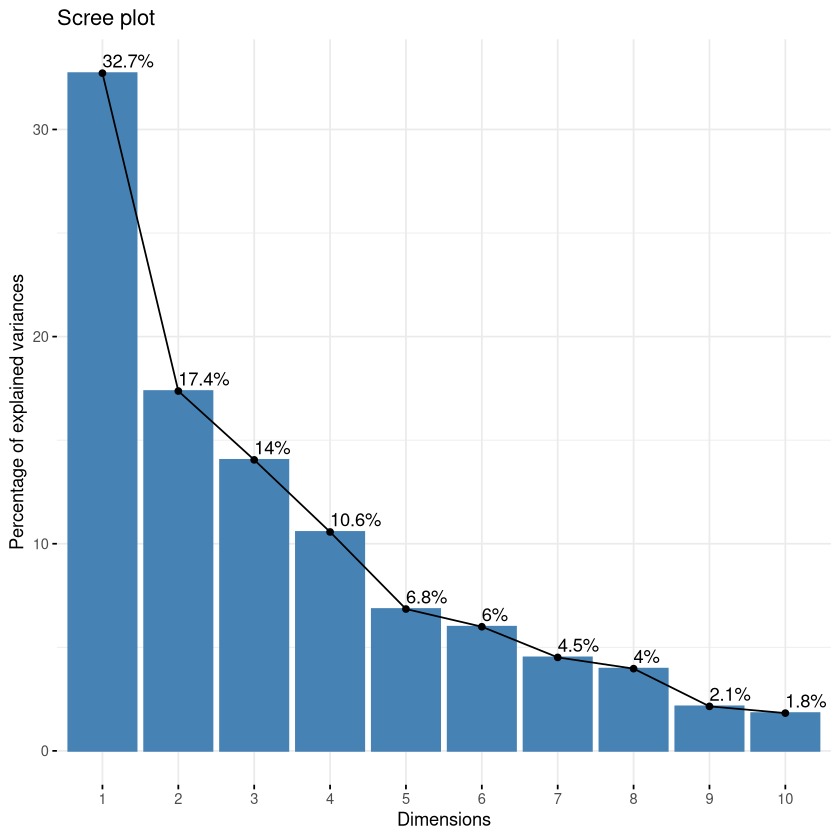

In [271]:
fviz_eig(res_acp, addlabels = TRUE)

Ici on visualise les valeurs propres. Cela montre le pourcentage de variances expliquées par chaque
axe principal.

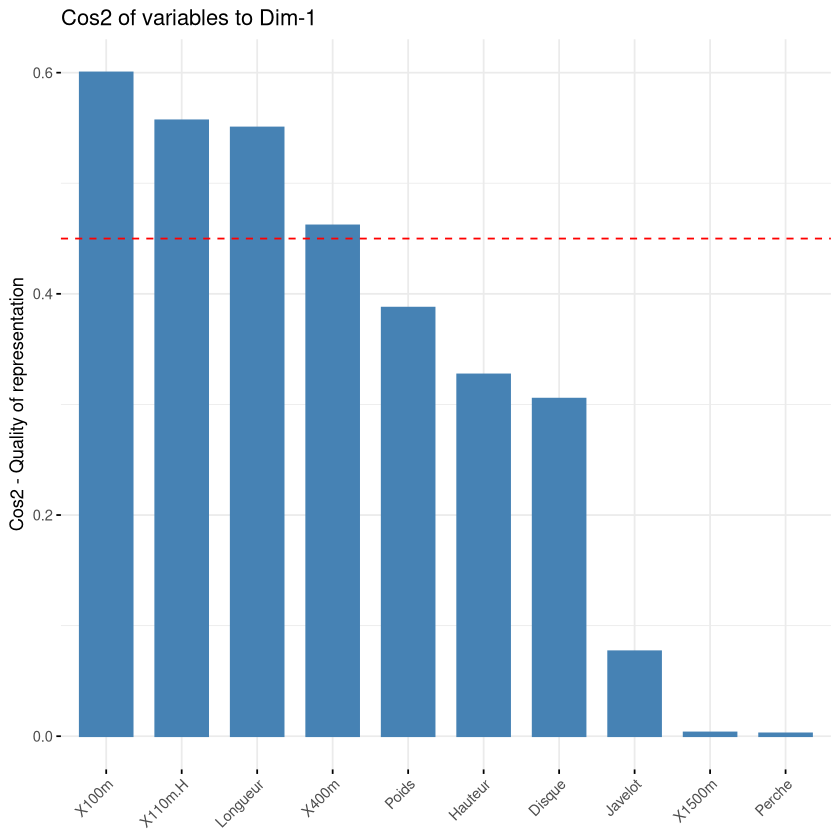

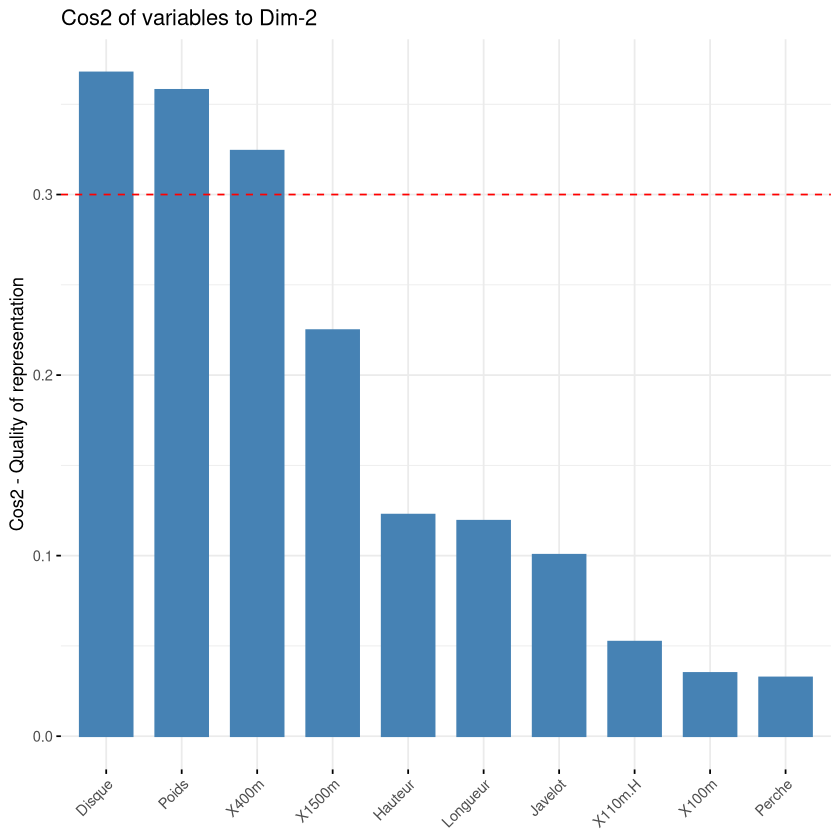

In [269]:
fviz_cos2(res_acp, choice="var", axes=1) +
geom_hline(yintercept = 0.45, linetype = 2, color = "red")
fviz_cos2(res_acp, choice="var", axes=2)+
geom_hline(yintercept = 0.3, linetype = 2, color = "red")

Ici on réalise la visualisation du Cos2 de nos variables selon les dimensions 1 et 2. Faire cette
représentation nous permet de comparer la qualité de représentation de nos variables selon nos
deux axes. Ici j’ai posé un seuil (le trait pointillé rouge) de 45% et 30% de qualité de représentation.
On peut donc voir que certaines variables sont bien représenté sur une dimension et beaucoup moins
sur une autre, c’est par exemple le cas de “ALED” ou “ALED".

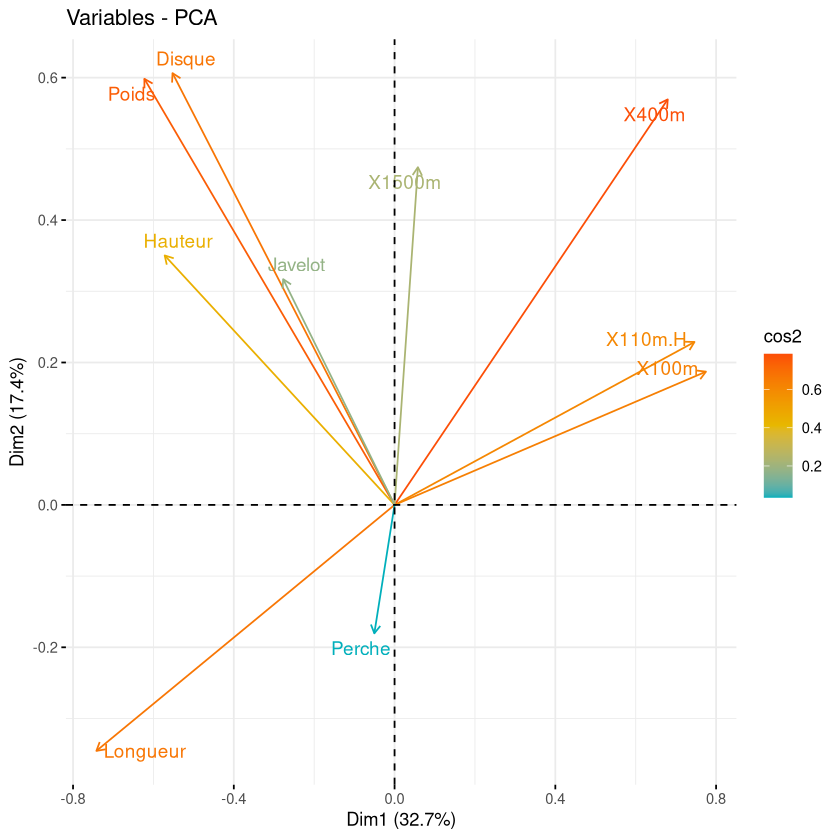

In [272]:
# Colorer en fonction du cos2: qualité de représentation
fviz_pca_var(res_acp, col.var = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE # Évite le chevauchement de texte
)

Cette représentation sur l’axe factoriel nous permet de bien remarquer la qualité de représentation
de nos variables.
On doit ici interpréter les axes de facon indépendante.

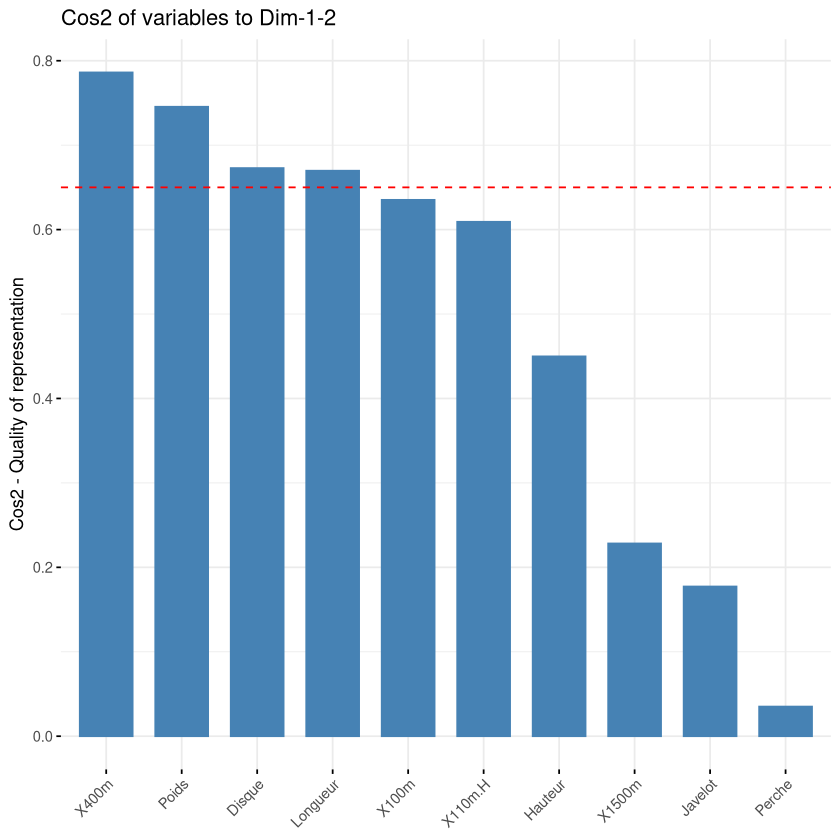

In [273]:
fviz_cos2(res_acp, choice="var", axes=1:2) +
geom_hline(yintercept = 0.65, linetype = 2, color = "red")

Ici on voit la qualité de représentation de nos variables avec les 2 dimensions en meme temps. On
remarque alors que “ALED” et “ALED” sont tres mal représentés et ne nous permettront pas
d’analyser correctement nos données.

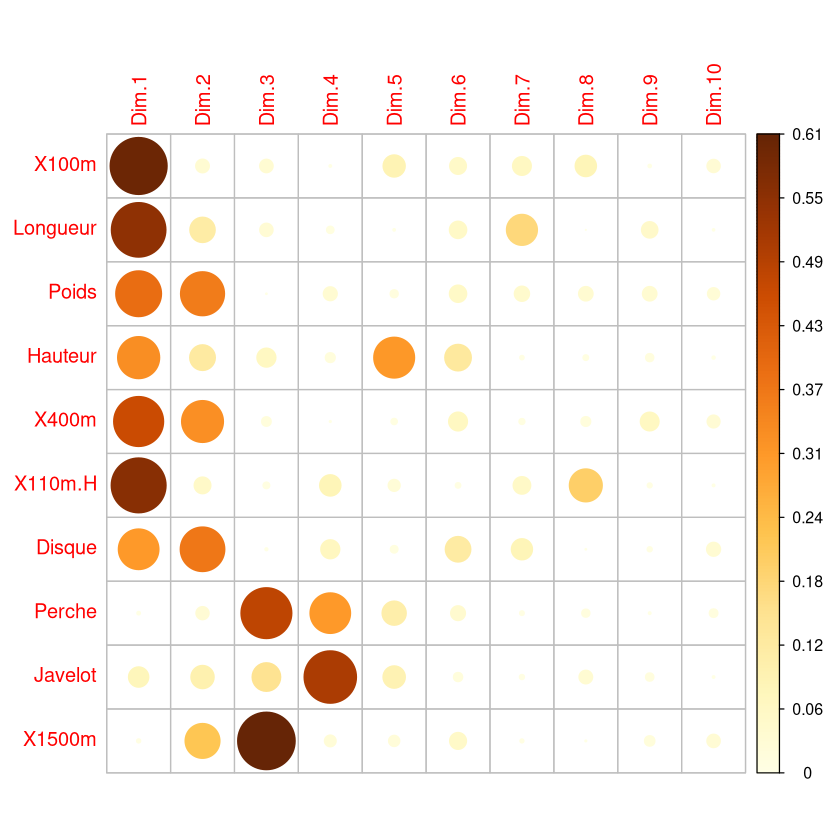

In [275]:
var <- get_pca_var(res_acp)
corrplot(var$cos2, is.corr=FALSE)

Les graphiques ci-dessus sont des graphiques de corrélation des variables. Ils montrent les relations
entre toutes les variables.\
On peut notamment voir dans le second que :\
-Les variables positivement corrélées sont regroupées.\
-Les variables négativement corrélées sont positionnées sur les côtés opposés de l’origine du graphique
(quadrants opposés).\
-La distance entre les variables et l’origine mesure la qualité de représentation des variables. Les
variables qui sont loin de l’origine sont bien représentées par l’ACP.\
Les colonnes “ALED”, “ALED”, “ALED” et “ALED” sont donc très corrélées, les autres sont un
peu plus répartis.

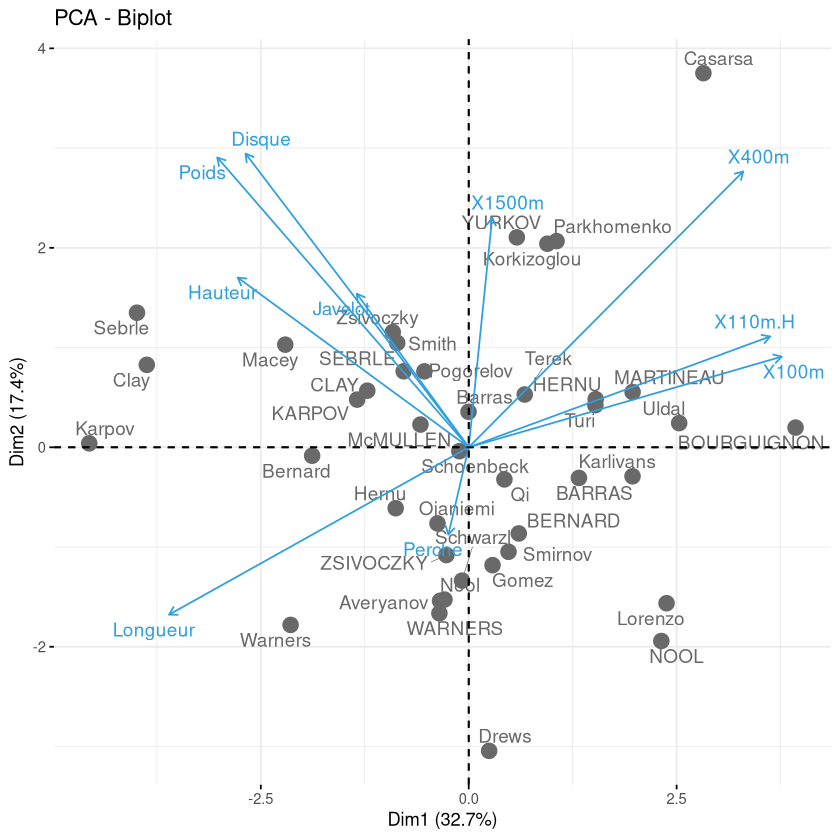

In [276]:
 fviz_pca_biplot(res_acp, repel = TRUE,
select.ind = list(name=rownames(df_scaled)),
col.var = "#2E9FDF", # Couleur des variables
col.ind = "#696969", # Couleur des individues
pointsize = 4
)

Grace au biplot, on peut avoir nos deux représentations sur le même plan et donc pouvoir avoir une
meilleur visualisation de nos résultats.

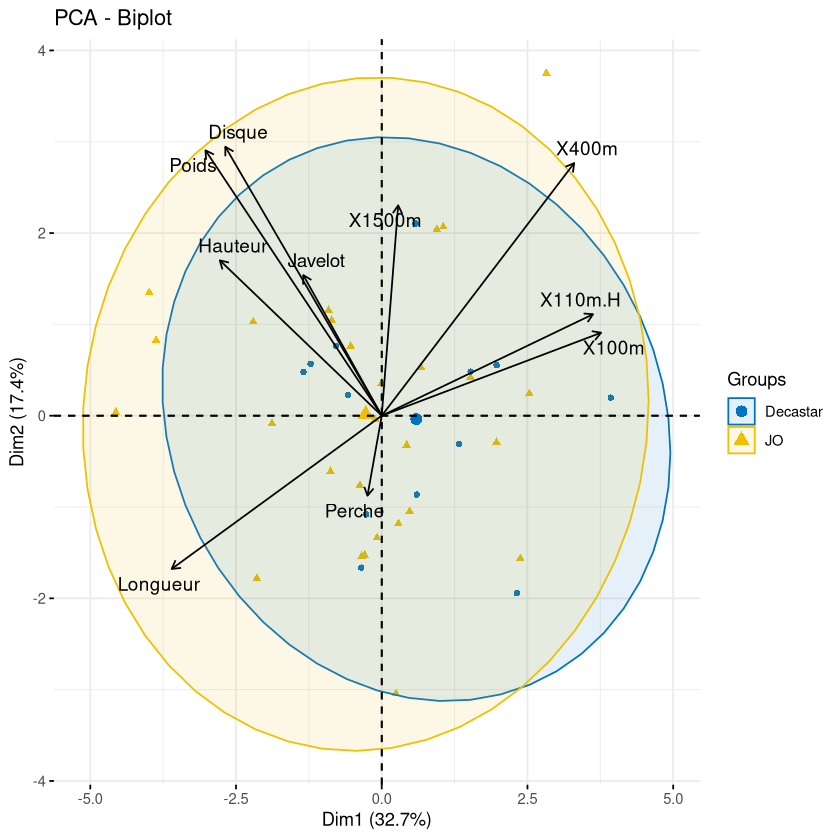

In [286]:
df_scaled[1:28, 13] = "JO"
df_scaled[29:41, 13] = "Decastar"
df_scaled$Competition = as.character(df_scaled$Competition)

fviz_pca_biplot(res_acp,
col.ind = df_scaled$Competition, palette = "jco",
addEllipses = TRUE, label = "var",
col.var = "black", repel = TRUE,
legend.title = "Groups")

super graphique ca\
On observe ici assez bien les différences entre les JO et le Decastar sur les scores.

## Régression logistique

***Quels sont les variables explicatives ?***\
Les variables explicatives sont le genre, l’age, ainsi que la classe des passagers.


***Quelle est la variable que l’on cherche à expliquer ?***\
La variable que l'on cherche a expliquer ici est 'Survived'.
Appliquer la régression logistique (Survivant ~ Classe + Age + Genre).

In [287]:
model = glm(df_scaled$Points ~ df_scaled$X100m + df_scaled$Longueur + df_scaled$Poids)

In [294]:
pander(summary(model))



|         &nbsp;         | Estimate | Std. Error | t value | Pr(>|t|)  |
|:----------------------:|:--------:|:----------:|:-------:|:---------:|
|    **(Intercept)**     |   8005   |   24.53    |  326.4  | 1.308e-65 |
|  **df_scaled$X100m**   |  -73.32  |   32.65    | -2.246  |  0.03077  |
| **df_scaled$Longueur** |  175.7   |   31.03    |  5.663  | 1.799e-06 |
|  **df_scaled$Poids**   |  156.5   |    26.6    |  5.882  | 9.075e-07 |


(Dispersion parameter for  gaussian  family taken to be  24667.95 )


|                    |                                    |
|:------------------:|:----------------------------------:|
|   Null deviance:   | 4689104  on 40  degrees of freedom |
| Residual deviance: | 912714  on 37  degrees of freedom  |



Quelles sont les caractéristiques des passagers qui n’ont pas réussi à survivre ?

Ici la t value est la t-statistique, qui est le coefficient estimé (la colonne 2) divisé par l'erreur standard.
Pr(>|t|) est la p-value correspondante a la t-statistique, plus la p-value est petite, plus le coefficient estimé est important.

plsssssssssssss

In [298]:
d <- df_scaled[df_scaled$Points > 8000,]
prop.table(table(d$Classement))


         1          2          3          4          5          6          7 
0.08695652 0.08695652 0.08695652 0.08695652 0.08695652 0.08695652 0.08695652 
         8          9         10         11         12         13         14 
0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 
        15         16 
0.04347826 0.04347826 

super

orevoir